In [ ]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from 



In [4]:
data=pd.read_csv("D:\ML\ML Assignment\Food_Delivery_Time_Prediction.csv")
df=pd.DataFrame(data)
print(df.head)

<bound method NDFrame.head of     Order_ID       Customer_Location     Restaurant_Location  Distance  \
0    ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1    ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2    ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3    ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4    ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   
..       ...                     ...                     ...       ...   
195  ORD0196   (17.910045, 81.56199)  (18.098924, 87.896124)     23.82   
196  ORD0197   (21.66459, 82.226635)  (16.892341, 80.554716)      6.09   
197  ORD0198   (14.575401, 82.55641)  (13.625369, 82.418092)     20.61   
198  ORD0199  (12.094497, 82.893369)  (19.135509, 86.659978)     24.06   
199  ORD0200  (19.360304, 84.132424)   (20.941636, 77.01334)      9.18   

    Weather_Conditions Traffic_Conditions  Delivery_Person_Experience  \
0       

In [ ]:
print(df.isnull().sum())

SyntaxError: invalid syntax (2967282437.py, line 3)

In [10]:
print(df.columns)
df_encoded = pd.get_dummies(
    df, 
    columns=['Weather_Conditions', 'Traffic_Conditions'], 
    drop_first=True ,
    dtype=int 
)
print(df_encoded.columns)

x=df_encoded[["Distance","Weather_Conditions_Rainy","Weather_Conditions_Snowy",
              "Weather_Conditions_Sunny","Traffic_Conditions_Low",
              "Traffic_Conditions_Medium","Delivery_Time"]]
Model=KMeans(n_clusters=2,random_state=42)
Model.fit(x)




Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')
Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount', 'Weather_Conditions_Rainy',
       'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny',
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium'],
      dtype='object')


c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

KMeans(n_clusters=2, random_state=42)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

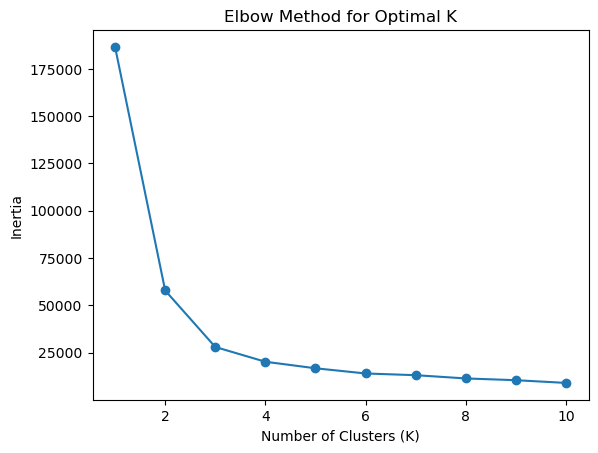

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [11]:
#Hierarchical Clustering
print(df.columns)
X=df_encoded[["Distance","Weather_Conditions_Rainy","Weather_Conditions_Snowy",
              "Weather_Conditions_Sunny","Traffic_Conditions_Low",
              "Traffic_Conditions_Medium","Delivery_Time"]]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

model=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
clusters=model.fit_predict(x_scaled)

#add cluster label to the dataset 
df['Cluster']=clusters
print(df["Cluster"])

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')
0      0
1      0
2      1
3      0
4      0
      ..
195    0
196    1
197    1
198    0
199    1
Name: Cluster, Length: 200, dtype: int64


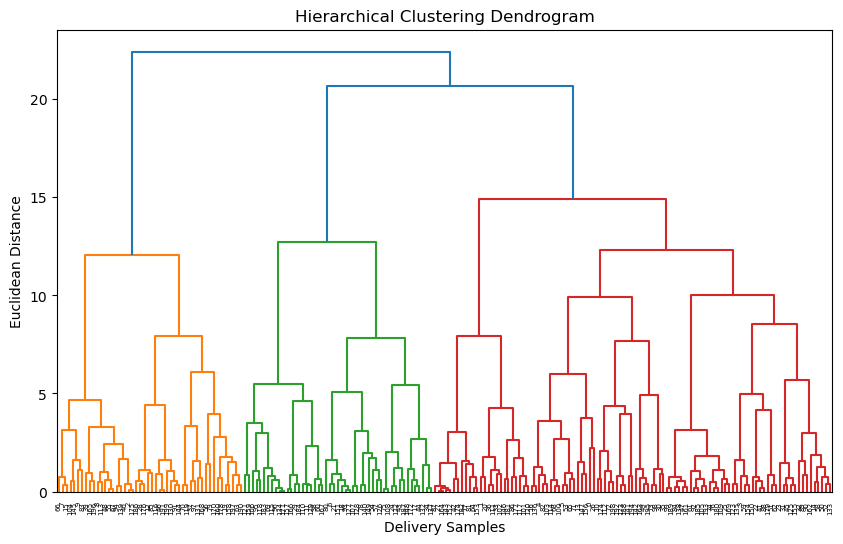

In [13]:
# Create the dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(x_scaled, method='ward'))

# Add titles and labels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Delivery Samples')
plt.ylabel('Euclidean Distance')
plt.show()